# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [3]:
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [4]:
filename = os.path.join(os.getcwd(), 'data', 'adultData.csv')
df = pd.read_csv(filename, header=0)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### Initial Exploration

In [6]:
# look at how many examples and features are in the dataset
df.shape

(32561, 15)

There are 32,561 employees in this dataset and 15 pieces of information about each of them.

In [7]:
# change education to an ordered categorical variable
df['education'] = pd.Categorical(df['education'], ordered=True, categories=['Preschool', '1st-4th', '5th-6th', '7th-8th', 
                                                                           '9th', '10th', '11th', '12th', 'HS-grad',
                                                                           'Some-college', 'Assoc-voc', 'Assoc-acdm',
                                                                           'Bachelors', 'Masters', 'Prof-school', 'Doctorate'])

In [8]:
# ensure all features are of the correct datatype
df.dtypes

age                float64
workclass           object
fnlwgt               int64
education         category
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex_selfID          object
capital-gain         int64
capital-loss         int64
hours-per-week     float64
native-country      object
income_binary       object
dtype: object

In [9]:
# get brief summaries of each variable
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


The label contains 325 missing values. The 'age', 'workclass', 'occupation', and 'native-country' features also contain missing values. All of the numeric features ('age', 'fnlwgt', 'capital-gain', and 'capital-loss') have high outliers.

In [10]:
# examine native-country closer
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [11]:
# create a new feature that groups native countries together and has fewer unique categories
native_country_group = []
for row in range(0,df.shape[0]):
    if df.loc[row]['native-country']=='United-States' or df.loc[row]['native-country']=='Puerto-Rico' or df.loc[row]['native-country']=='Outlying-US(Guam-USVI-etc)':
        native_country_group.append('United States')
    elif df.loc[row]['native-country']=='Canada' or df.loc[row]['native-country']=='Mexico' or df.loc[row]['native-country']=='Cuba' or df.loc[row]['native-country']=='Jamaica' or df.loc[row]['native-country']=='Haiti' or df.loc[row]['native-country']=='Dominican-Republic':
        native_country_group.append('Non-U.S. North America')
    elif df.loc[row]['native-country']=='Guatemala' or df.loc[row]['native-country']=='Honduras' or df.loc[row]['native-country']=='Nicaragua' or df.loc[row]['native-country']=='El-Salvador':
        native_country_group.append('Central America')
    elif df.loc[row]['native-country']=='Ecuador' or df.loc[row]['native-country']=='Columbia' or df.loc[row]['native-country']=='Peru' or df.loc[row]['native-country']=='Trinadad&Tobago':
        native_country_group.append('South America')
    elif df.loc[row]['native-country']=='England' or df.loc[row]['native-country']=='Germany' or df.loc[row]['native-country']=='Greece' or df.loc[row]['native-country']=='Italy' or df.loc[row]['native-country']=='Poland' or df.loc[row]['native-country']=='Portugal' or df.loc[row]['native-country']=='Ireland' or df.loc[row]['native-country']=='France' or df.loc[row]['native-country']=='Hungary' or df.loc[row]['native-country']=='Scotland' or df.loc[row]['native-country']=='Yugoslavia' or df.loc[row]['native-country']=='Holand-Netherlands':
        native_country_group.append('Europe')
    elif df.loc[row]['native-country']=='Cambodia' or df.loc[row]['native-country']=='India' or df.loc[row]['native-country']=='Japan' or df.loc[row]['native-country']=='China' or df.loc[row]['native-country']=='Iran' or df.loc[row]['native-country']=='Philippines' or df.loc[row]['native-country']=='Vietnam' or df.loc[row]['native-country']=='Laos' or df.loc[row]['native-country']=='Thailand' or df.loc[row]['native-country']=='Hong' or df.loc[row]['native-country']=='Taiwan':
        native_country_group.append('Asia')
    else:
        native_country_group.append(None)
df['native-country-group'] = native_country_group

In [12]:
# examine the values of the new feature
df['native-country-group'].value_counts()

United States             29298
Non-U.S. North America     1054
Asia                        671
Europe                      521
Central America             217
South America               137
Name: native-country-group, dtype: int64

### Feature and Label Visualization

In [13]:
# look at the values of the label
df['hours-per-week'].value_counts()

40.0    15062
50.0     2796
45.0     1807
60.0     1460
35.0     1287
        ...  
92.0        1
94.0        1
82.0        1
74.0        1
87.0        1
Name: hours-per-week, Length: 94, dtype: int64

Almost half of the employees in the dataset work 40 hours per week. Slightly more than two-thirds of the employees work 35, 40, 45, 50, or 60 hours per week.

Text(0, 0.5, 'Employees')

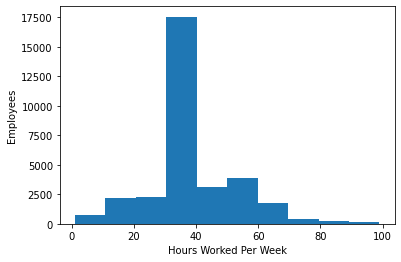

In [14]:
# plot a histogram of the label to look at its distribution
plt.hist(df['hours-per-week'])
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Employees')

The histogram of 'hours-per-week' shows how most of the employees in the dataset work between 30 and 40 hours per week. Very few employees work less than 10 hours or more than 70 hours per week.

In [15]:
# look at the correlation between the label and the numeric features
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076267,0.036761,0.124901,0.057545,0.067066
fnlwgt,-0.076267,1.000000,-0.043195,-0.002234,-0.010252,-0.018130
education-num,0.036761,-0.043195,1.000000,0.167089,0.079923,0.147256
capital-gain,0.124901,-0.002234,0.167089,1.000000,-0.055138,0.101594
capital-loss,0.057545,-0.010252,0.079923,-0.055138,1.000000,0.054500
hours-per-week,0.067066,-0.018130,0.147256,0.101594,0.054500,1.000000


The 'hours-per-week' column in the correlation matrix shows that 'education-num' is the most highly correlated numeric feature with the label, followed by 'capital-gain,' then 'age,' then 'capital-loss,' and finally 'fnlwgt.' None of these correlations are very high, though, and 'fnlwgt' and 'hours-per-week' especially have a correlation of near 0. 

Text(0, 0.5, 'Hours Worked Per Week')

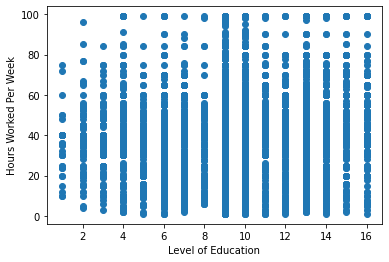

In [16]:
# create scatter plots to examine the relationship between the label and numeric features
plt.scatter(df['education-num'], df['hours-per-week'])
plt.xlabel('Level of Education')
plt.ylabel('Hours Worked Per Week')

This scatterplot indicates that the 'education-num' feature should be dropped in favor of 'education' because it is truly a categorical feature.

Text(0, 0.5, 'Hours Worked Per Week')

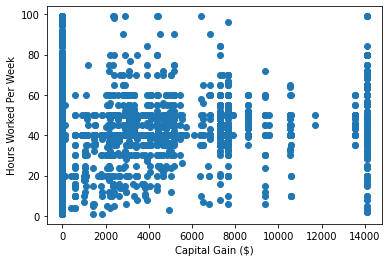

In [17]:
plt.scatter(df['capital-gain'], df['hours-per-week'])
plt.xlabel('Capital Gain ($)')
plt.ylabel('Hours Worked Per Week')

This scatterplot shows how many people have no capital gain and indicates that a select few have very large amounts. There seems to be a slightly positive relationship between hours per week and capital gain, for those who have more than 0.

Text(0, 0.5, 'Hours Worked Per Week')

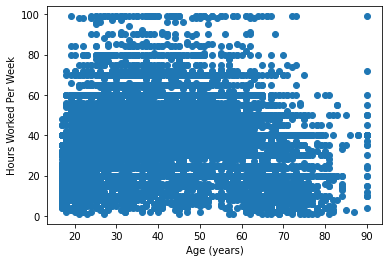

In [18]:
plt.scatter(df['age'], df['hours-per-week'])
plt.xlabel('Age (years)')
plt.ylabel('Hours Worked Per Week')

This scatterplot shows that most people in the dataset are between the ages of 17 and 70, with very few older than 70. Interestingly, the older people (80 year olds and 90 year olds) that are still working have a range of hours, and at least one 90 year old is reported to still work 100 hours a week.

Text(0, 0.5, 'Hours Worked Per Week')

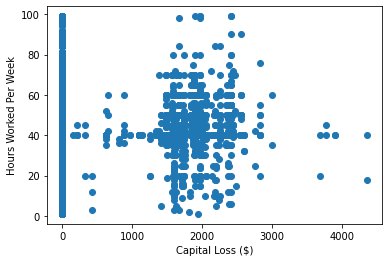

In [19]:
plt.scatter(df['capital-loss'], df['hours-per-week'])
plt.xlabel('Capital Loss ($)')
plt.ylabel('Hours Worked Per Week')

This scatterplot shows that the vast majority of the employees in the dataset have no capital loss. Those that have any capital loss seem to have around $2000 worth.

Text(0, 0.5, 'Hours Worked Per Week')

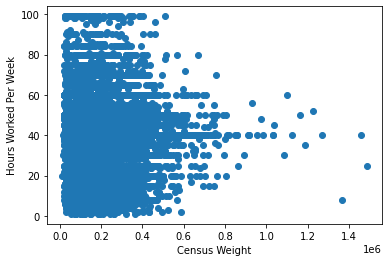

In [20]:
plt.scatter(df['fnlwgt'], df['hours-per-week'])
plt.xlabel('Census Weight')
plt.ylabel('Hours Worked Per Week')

This scatterplot shows that most people's census weights (which, according to the "Weighting" page on Census.gov, "estimate the number of people in the target population that each person represents") range from 0 to 0.4.

Text(0, 0.5, 'Hours Worked Per Week')

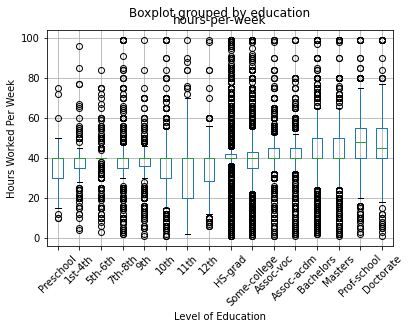

In [21]:
# create boxplots to examine the relationship between the label and categorical features
df.boxplot(column='hours-per-week', by='education', rot=45)
plt.xlabel('Level of Education')
plt.ylabel('Hours Worked Per Week')

This boxplot shows that, as the level of education increases, the median number of hours worked per week increases as well.

Text(0, 0.5, 'Hours Worked Per Week')

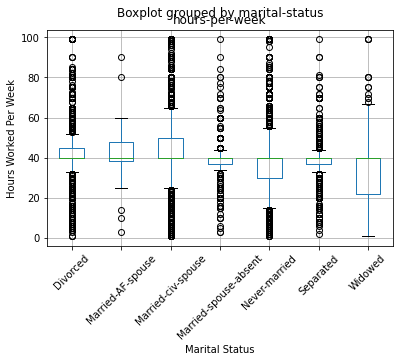

In [22]:
df.boxplot(column='hours-per-week', by='marital-status', rot=45)
plt.xlabel('Marital Status')
plt.ylabel('Hours Worked Per Week')

This boxplot shows that, interestingly, people who have never married, are separated, have an absent spouse, or are widowed tend to work less hours per week than those who are married or divorced.

Text(0, 0.5, 'Hours Worked Per Week')

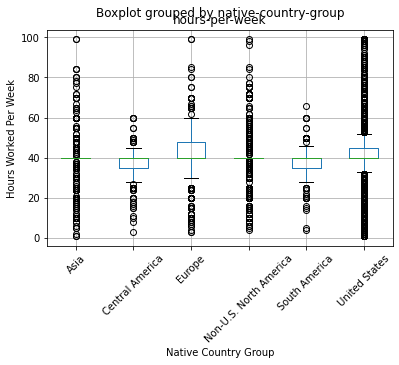

In [23]:
df.boxplot(column='hours-per-week', by='native-country-group', rot=45)
plt.xlabel('Native Country Group')
plt.ylabel('Hours Worked Per Week')

This boxplot reflects how many people in the dataset are from the U.S. and shows that people from Central America or South America work less hours per week, on average.

Text(0, 0.5, 'Hours Worked Per Week')

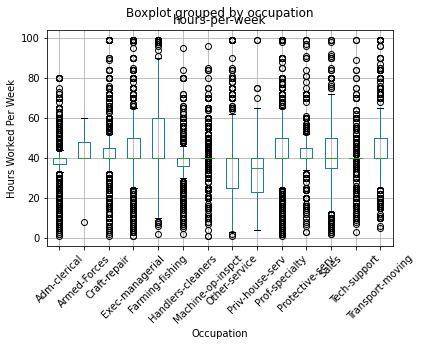

In [24]:
df.boxplot(column='hours-per-week', by='occupation', rot=45)
plt.xlabel('Occupation')
plt.ylabel('Hours Worked Per Week')

This boxplot shows that there are a variety of ranges of hours worked per week depending on occupation and shows how few people in the dataset belong to the Armed Forces category.

Text(0, 0.5, 'Hours Worked Per Week')

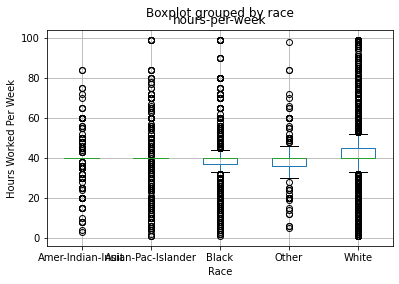

In [25]:
df.boxplot(column='hours-per-week', by='race')
plt.xlabel('Race')
plt.ylabel('Hours Worked Per Week')

This boxplot shows how many people in the dataset are white but doesn't indicate much of a relationship between race and hours worked per week.

Text(0, 0.5, 'Hours Worked Per Week')

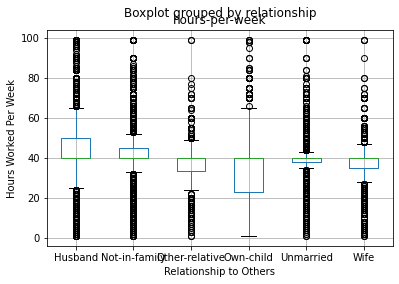

In [26]:
df.boxplot(column='hours-per-week', by='relationship')
plt.xlabel('Relationship to Others')
plt.ylabel('Hours Worked Per Week')

This boxplot shows that people in the 'Husband' category tend to work the most hours per week, while people in the 'Own-child' category tend to work the least, alluding to some relationship between the label and the sex/gender feature.

Text(0, 0.5, 'Hours Worked Per Week')

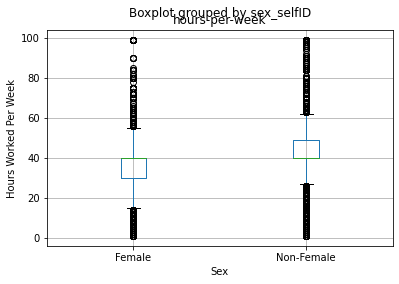

In [27]:
df.boxplot(column='hours-per-week', by='sex_selfID')
plt.xlabel('Sex')
plt.ylabel('Hours Worked Per Week')

This boxplot shows that the gender of the employee affects how many hours per week that they work -- women seem to work fewer hours per week than men do, on average.

Text(0, 0.5, 'Hours Worked Per Week')

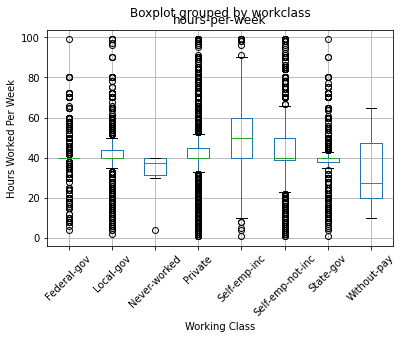

In [28]:
df.boxplot(column='hours-per-week', by='workclass', rot=45)
plt.xlabel('Working Class')
plt.ylabel('Hours Worked Per Week')

This boxplot shows that most people in the dataset do not belong to the 'Never-worked' or 'Without-pay' classes. The class with the largest median number of hours worked per week is the 'Self-emp-inc' class.

### Fixing Examples with Missing Values

In [29]:
# examine which columns have missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                      162
workclass               1836
fnlwgt                     0
education                  0
education-num              0
marital-status             0
occupation              1843
relationship               0
race                       0
sex_selfID                 0
capital-gain               0
capital-loss               0
hours-per-week           325
native-country           583
income_binary              0
native-country-group     663
dtype: int64

In [30]:
# remove records with missing values in workclass and occupation and native country group and hours per week
# start by creating series of True and False depending on whether each example has a missing value
workclass_null = df['workclass'].isnull()
occupation_null = df['occupation'].isnull()
country_null = df['native-country-group'].isnull()
label_null = df['hours-per-week'].isnull()

In [31]:
# if an example has a missing value in it, add it to the list of rows to drop
rows_to_drop = []
for row in range(0,df.shape[0]):
    if workclass_null[row] or occupation_null[row] or country_null[row] or label_null[row]:
        rows_to_drop.append(row)

In [32]:
# remove the rows with missing values from the dataset
df.drop(index=rows_to_drop, axis=0, inplace=True)

In [33]:
# examine which columns still have missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                     148
workclass                 0
fnlwgt                    0
education                 0
education-num             0
marital-status            0
occupation                0
relationship              0
race                      0
sex_selfID                0
capital-gain              0
capital-loss              0
hours-per-week            0
native-country            0
income_binary             0
native-country-group      0
dtype: int64

In [34]:
# impute missing values in age with mean
df['age'].fillna(value=df['age'].mean(), inplace=True)
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                     0
workclass               0
fnlwgt                  0
education               0
education-num           0
marital-status          0
occupation              0
relationship            0
race                    0
sex_selfID              0
capital-gain            0
capital-loss            0
hours-per-week          0
native-country          0
income_binary           0
native-country-group    0
dtype: int64

In [35]:
# look at how many examples are left after removing those with missing values
df.shape

(29795, 16)

### Preparing the Categorical Features

In [36]:
# look at categorical features to one-hot encode
cols_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country-group']
df[cols_to_encode].nunique()

workclass                7
education               16
marital-status           7
occupation              14
relationship             6
race                     5
sex_selfID               2
native-country-group     6
dtype: int64

In [37]:
# one-hot encode the categorical features
for col in cols_to_encode:
    temp_df = pd.get_dummies(df[col], prefix=col)
    df = df.join(temp_df)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary', 'native-country-group', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_Preschool', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_10th', 'education_11th', 'education_12th',
       'education_HS-grad', 'education_Some-college', 'education_Assoc-voc',
       'education_Assoc-acdm', 'education_Bachelors', 'education_Masters',
       'education_Prof-school', 'education_Doctorate',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 

### Preparing the Numeric Features

In [38]:
# winsorization to address outliers in numeric features
df['age_win'] = stats.mstats.winsorize(df['age'], limits=[.01,.01])
df['fnlwgt_win'] = stats.mstats.winsorize(df['fnlwgt'], limits=[.01,.01])
df['capital-gain_win'] = stats.mstats.winsorize(df['capital-gain'], limits=[.01,.01])
df['capital-loss_win'] = stats.mstats.winsorize(df['capital-loss'], limits=[.01,.01])

In [39]:
# standardize numeric features
df.num_features = df[['age_win', 'fnlwgt_win', 'capital-gain_win', 'capital-loss_win']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.num_features)
scaled_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


array([[ 0.04771954, -1.11298696,  0.63307957, -0.22049213],
       [ 0.89870873, -1.05497744, -0.25668842, -0.22049213],
       [-0.02964311,  0.26973174, -0.25668842, -0.22049213],
       ...,
       [ 1.51760995, -0.36828288, -0.25668842, -0.22049213],
       [-1.26744557,  0.12802635, -0.25668842, -0.22049213],
       [ 1.05343403,  0.99328412,  5.50756748, -0.22049213]])

In [40]:
# add standardized columns to dataset
df['age_scaled'] = scaled_data[:,0]
df['fnlwgt_scaled'] = scaled_data[:,1]
df['capital-gain_scaled'] = scaled_data[:,2]
df['capital-loss_scaled'] = scaled_data[:,3]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary', 'native-country-group', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_Preschool', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_10th', 'education_11th', 'education_12th',
       'education_HS-grad', 'education_Some-college', 'education_Assoc-voc',
       'education_Assoc-acdm', 'education_Bachelors', 'education_Masters',
       'education_Prof-school', 'education_Doctorate',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### Building and Analyzing the First Set of Models

In [41]:
# create label and features
y = df['hours-per-week']
X = df.drop(columns=['hours-per-week','age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                     'relationship','race','sex_selfID','capital-gain','capital-loss','native-country','income_binary',
                     'native-country-group', 'age_win', 'fnlwgt_win', 'capital-gain_win', 'capital-loss_win'])

In [42]:
# examine the features to be included in models
X.columns

Index(['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_Preschool',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_10th', 'education_11th', 'education_12th',
       'education_HS-grad', 'education_Some-college', 'education_Assoc-voc',
       'education_Assoc-acdm', 'education_Bachelors', 'education_Masters',
       'education_Prof-school', 'education_Doctorate',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_

In [43]:
# split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [44]:
# fit a linear regression model using the default parameters
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
lin_preds = lin_mod.predict(X_test)

In [45]:
# fit a decision tree using the default parameters
tree_mod = DecisionTreeRegressor()
tree_mod.fit(X_train, y_train)
tree_preds = tree_mod.predict(X_test)

In [46]:
# fit a random forest using the default parameters
rf_mod = RandomForestRegressor()
rf_mod.fit(X_train, y_train)
rf_preds = rf_mod.predict(X_test)

In [47]:
# fit a gradient boosted decision tree using the default parameters
gbdt_mod = GradientBoostingRegressor()
gbdt_mod.fit(X_train, y_train)
gbdt_preds = gbdt_mod.predict(X_test)

In [48]:
# calculate the RMSEs from each of the models
lin_rmse = mean_squared_error(y_test, lin_preds, squared=False)
tree_rmse = mean_squared_error(y_test, tree_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
gbdt_rmse = mean_squared_error(y_test, gbdt_preds, squared=False)

In [49]:
# calculate the R2 values from each of the models
lin_r2 = r2_score(y_test, lin_preds)
tree_r2 = r2_score(y_test, tree_preds)
rf_r2 = r2_score(y_test, rf_preds)
gbdt_r2 = r2_score(y_test, gbdt_preds)

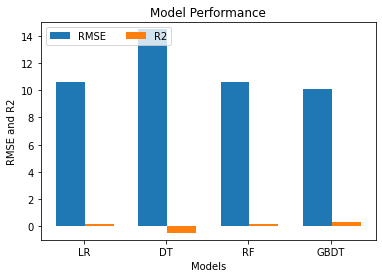

In [50]:
# plot the results of the first run-through of the models
# collect the results into lists
RMSEs = [lin_rmse, tree_rmse, rf_rmse, gbdt_rmse]
R2s = [lin_r2, tree_r2, rf_r2, gbdt_r2]
# set up plotting parameters
rg= np.arange(4)
width = 0.35
# plot the bars for each metric
plt.bar(x=rg, height=RMSEs, width=width, label='RMSE')
plt.bar(x=rg+width, height=R2s, width=width, label='R2')
# add labels for each of the models
plt.xticks(ticks=rg+.16, labels=['LR', 'DT', 'RF', 'GBDT'])
# add labels to axes
plt.xlabel('Models')
plt.ylabel('RMSE and R2')
# finishing touches on graph
plt.ylim([-1,15])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [51]:
# examine RMSE and R2 values for each model
print(RMSEs)
print(R2s)

[10.624844353096133, 14.478544679833798, 10.596323653461521, 10.07249162249738]
[0.19434638113293667, -0.49607384424769996, 0.19866587306805294, 0.27593586086351196]


The first set of models didn't work very well to predict the number of hours people work per week from the features in the dataset. The decision tree model performed the worst, with an RMSE around 15 and a negative value of R2. The linear regression, random forest, and gradient boosted decision tree models performed better than the single decision tree, but still not very well. These other three models each had RMSEs around 10 and R2 values around 0.2. The gradient-boosted decision tree performed the best of all, with the lowest RMSE and the highest R2, but with an RMSE of 10.07 and a R2 of 0.28, it still wasn't great.

Text(0, 0.5, 'LR Predicted Hours Per Week')

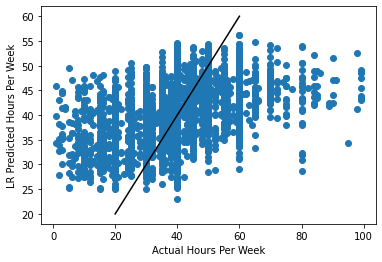

In [52]:
# plot predictions against actual hours per week values
plt.scatter(y_test, lin_preds)
x = np.linspace(20,60,num=40)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('LR Predicted Hours Per Week')

The linear regression model's predictions had a much smaller range (from around 20 to 60) than the actual hours per week label did (which was from 0 to 100). This makes sense given that so many of the employees in the dataset worked around 40 hours, and very few worked less than 10 or more than 70. As a result, the linear regression model overpredicted hours per week for those working less than 40 hours per week and underpredicted hours per week for those working more than 40 hours per week.

Text(0, 0.5, 'DT Predicted Hours Per Week')

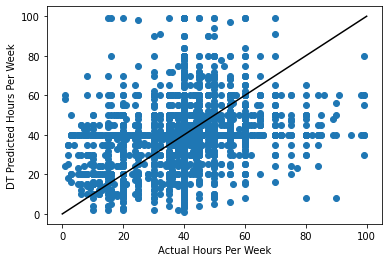

In [53]:
plt.scatter(y_test, tree_preds)
x = np.linspace(0,100,num=100)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('DT Predicted Hours Per Week')

The decision tree's predictions ranged from 0 to 100 like the actual hours per week label did, but there is a lot of variance in the predictions. There seems to be an equal amount of overpredicting and underpredicting happening, with no real pattern.

Text(0, 0.5, 'RF Predicted Hours Per Week')

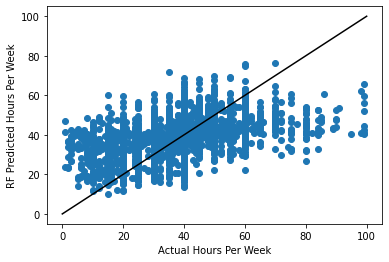

In [54]:
plt.scatter(y_test, rf_preds)
x = np.linspace(0,100,num=100)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('RF Predicted Hours Per Week')

The random forest's predictions have much less variance than the decision tree's predictions, and are more tightly pulled in to the line of y=x. However, the range of predictions from the random forest model is from 10 to 80, and doesn't quite encapsulate the whole range of the actual label. Most of the random forest's predictions seem to be around 40 hours.

Text(0, 0.5, 'GBDT Predicted Hours Per Week')

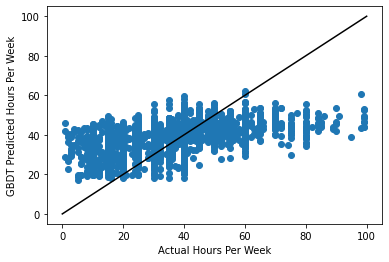

In [55]:
plt.scatter(y_test, gbdt_preds)
x = np.linspace(0,100,num=100)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('GBDT Predicted Hours Per Week')

The gradient-boosted decision tree's predictions have even less variance than the random forest's predictions do, with most of them very close to 40 hours a week. Since most of the employees in the dataset worked approximately 40 hours a week, it makes sense as to why this model originally performed the best out of all of them.

In [56]:
# look at regression coefficients
lin_coefs = pd.Series(lin_mod.coef_, index=X.columns)
lin_coefs.sort_values(ascending=False, inplace=True)
print(lin_coefs[:60])
print(lin_coefs[60:])

workclass_Self-emp-inc                  6.489813e+13
workclass_Self-emp-not-inc              6.489813e+13
workclass_Private                       6.489813e+13
workclass_Local-gov                     6.489813e+13
workclass_Federal-gov                   6.489813e+13
workclass_State-gov                     6.489813e+13
workclass_Without-pay                   6.489813e+13
marital-status_Married-AF-spouse        8.635528e+12
marital-status_Married-civ-spouse       8.635528e+12
marital-status_Divorced                 8.635528e+12
marital-status_Separated                8.635528e+12
marital-status_Married-spouse-absent    8.635528e+12
marital-status_Never-married            8.635528e+12
marital-status_Widowed                  8.635528e+12
race_Other                              6.667596e+12
race_White                              6.667596e+12
race_Amer-Indian-Inuit                  6.667596e+12
race_Black                              6.667596e+12
race_Asian-Pac-Islander                 6.6675

In [57]:
# make feature importance plots for each of the tree-based models
tree_imps = pd.Series(tree_mod.feature_importances_, index=X.columns)
tree_imps.sort_values(ascending=False, inplace=True)

Text(0.5, 1.0, 'Top 10 Most Important Features in DT')

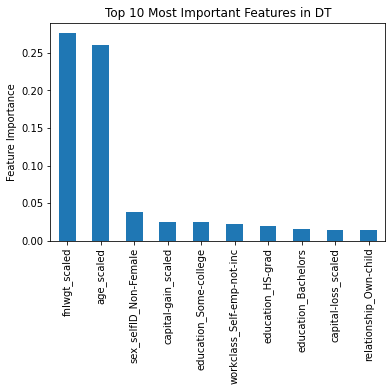

In [58]:
# plot the 10 most important features
tree_imps[:10].plot.bar()
plt.ylabel('Feature Importance')
plt.title('Top 10 Most Important Features in DT')

The standardized versions of fnlwgt and age were by far the most important features used to predict hours per week in the single decision tree model. Most of the other features had importances near 0.

In [59]:
rf_imps = pd.Series(rf_mod.feature_importances_, index=X.columns)
rf_imps.sort_values(ascending=False, inplace=True)

Text(0.5, 1.0, 'Top 10 Most Important Features in RF')

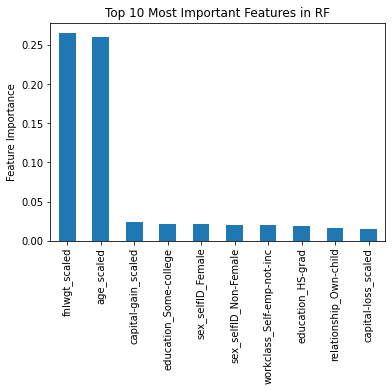

In [60]:
rf_imps[:10].plot.bar()
plt.ylabel('Feature Importance')
plt.title('Top 10 Most Important Features in RF')

The random forest model had the same two most important features as the single decision tree model did.

In [61]:
gbdt_imps = pd.Series(gbdt_mod.feature_importances_, index=X.columns)
gbdt_imps.sort_values(ascending=False, inplace=True)

Text(0.5, 1.0, 'Top 10 Most Important Features in GBDT')

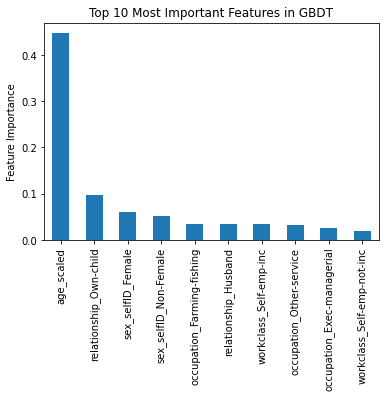

In [62]:
gbdt_imps[:10].plot.bar()
plt.ylabel('Feature Importance')
plt.title('Top 10 Most Important Features in GBDT')

The gradient-boosted decision tree model identified age as the single most important feature for predicting hours per week. Interestingly, the fnlwgt feature was not anywhere in the top 10 of this model, even though it was the second most important feature in the single decision tree and random forest models.

In [65]:
# look at how many features in each model had importances very close to 0
print(sum(tree_imps<.01))
print(sum(rf_imps<.01))
print(sum(gbdt_imps<.01))

52
50
52


Most of the features included in each of the three tree-based models were relatively unimportant to predicting hours per week. Only 15 of the single tree model's features, 17 of the random forest's, and 15 of the gradient-boosted decision tree's had importances that were greater than .01. Some of the features that didn't show up at all in the most important features for any of the models were 'native-country-group', 'race', and 'marital-status.'

### Building and Analyzing the Second Set of Models

In [66]:
# drop the least important features and make new X sets
X_new = X.drop(columns=['native-country-group_Asia', 'native-country-group_Central America', 'native-country-group_Europe',
                'native-country-group_Non-U.S. North America', 'native-country-group_South America',
                'native-country-group_United States', 'race_Amer-Indian-Inuit', 'race_Asian-Pac-Islander', 'race_Black', 
                'race_Other', 'race_White', 'marital-status_Divorced', 'marital-status_Married-AF-spouse',
                'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married',
                'marital-status_Separated', 'marital-status_Widowed'])
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=.2, random_state=12)

In [67]:
# grid search with DT
tree_param_grid = {'max_depth':[4,8], 'min_samples_leaf':[50,100]}
tree_new = DecisionTreeRegressor()
tree_grid = GridSearchCV(tree_new, tree_param_grid, cv=3)
tree_grid_search = tree_grid.fit(X_train_new, y_train)
print(tree_grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 100}


In [68]:
# grid search with RF
rf_param_grid = {'n_estimators':[150,300], 'max_features':[5,8]}
rf_new = RandomForestRegressor()
rf_grid = GridSearchCV(rf_new, rf_param_grid, cv=3)
rf_grid_search = rf_grid.fit(X_train_new, y_train)
print(rf_grid_search.best_params_)

{'max_features': 8, 'n_estimators': 300}


In [69]:
# grid search with GBDT
gbdt_param_grid = {'max_depth':[4,6], 'n_estimators':[150,300], 'learning_rate':[.1,.3]}
gbdt_new = GradientBoostingRegressor()
gbdt_grid = GridSearchCV(gbdt_new, gbdt_param_grid, cv=3)
gbdt_grid_search = gbdt_grid.fit(X_train_new, y_train)
print(gbdt_grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


In [70]:
# fit a new linear regression model
lin_mod_new = LinearRegression()
lin_mod_new.fit(X_train_new, y_train)
lin_preds_new = lin_mod_new.predict(X_test_new)

In [71]:
# fit a new decision tree using the optimized parameters
tree_mod_new = DecisionTreeRegressor(max_depth=8, min_samples_leaf=100)
tree_mod_new.fit(X_train_new, y_train)
tree_preds_new = tree_mod_new.predict(X_test_new)

In [72]:
# fit a new random forest using the optimized parameters
rf_mod_new = RandomForestRegressor(max_features=8, n_estimators=300)
rf_mod_new.fit(X_train_new, y_train)
rf_preds_new = rf_mod_new.predict(X_test_new)

In [73]:
# fit a new gradient boosted decision tree using the optimized parameters
gbdt_mod_new = GradientBoostingRegressor(max_depth=4, n_estimators=150, learning_rate=.1)
gbdt_mod_new.fit(X_train_new, y_train)
gbdt_preds_new = gbdt_mod_new.predict(X_test_new)

In [74]:
# calculate the RMSEs from each of the models
lin_rmse_new = mean_squared_error(y_test, lin_preds_new, squared=False)
tree_rmse_new = mean_squared_error(y_test, tree_preds_new, squared=False)
rf_rmse_new = mean_squared_error(y_test, rf_preds_new, squared=False)
gbdt_rmse_new = mean_squared_error(y_test, gbdt_preds_new, squared=False)

In [75]:
# calculate the R2 values from each of the models
lin_r2_new = r2_score(y_test, lin_preds_new)
tree_r2_new = r2_score(y_test, tree_preds_new)
rf_r2_new = r2_score(y_test, rf_preds_new)
gbdt_r2_new = r2_score(y_test, gbdt_preds_new)

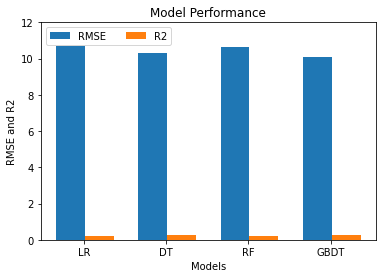

In [76]:
# plot the results of the second run-through of the models
# collect the results into lists
RMSEs_new = [lin_rmse_new, tree_rmse_new, rf_rmse_new, gbdt_rmse_new]
R2s_new = [lin_r2_new, tree_r2_new, rf_r2_new, gbdt_r2_new]
# set up plotting parameters
rg= np.arange(4)
width = 0.35
# plot the bars for each metric
plt.bar(x=rg, height=RMSEs_new, width=width, label='RMSE')
plt.bar(x=rg+width, height=R2s_new, width=width, label='R2')
# add labels for each of the models
plt.xticks(ticks=rg+.16, labels=['LR', 'DT', 'RF', 'GBDT'])
# add labels to axes
plt.xlabel('Models')
plt.ylabel('RMSE and R2')
# finishing touches on graph
plt.ylim([0,12])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [77]:
# examine RMSE and R2 values for each model
print(RMSEs_new)
print(RMSEs)
print(R2s_new)
print(R2s)

[10.691548673755335, 10.30243532402078, 10.640176856177693, 10.085835353740384]
[10.624844353096133, 14.478544679833798, 10.596323653461521, 10.07249162249738]
[0.18419860463320548, 0.2424993626789863, 0.19201945771793205, 0.2740161537220006]
[0.19434638113293667, -0.49607384424769996, 0.19866587306805294, 0.27593586086351196]


On the whole, the models performed better this time at predicting hours per week than they did the first time. The single decision tree model, in particular, went from performing the worst to being the second best model, in terms of its RMSE and R2. The GBDT continued to perform the best, with the lowest RMSE and highest R2. With the exception of the single decision tree model, the grid searches and dropping of certain features didn't seem to affect the models that much, though.

Text(0, 0.5, 'LR Predicted Hours Per Week')

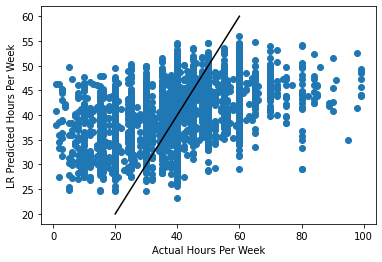

In [78]:
# plot predictions against actual hours per week values
plt.scatter(y_test, lin_preds_new)
x = np.linspace(20,60,num=40)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('LR Predicted Hours Per Week')

Text(0, 0.5, 'DT Predicted Hours Per Week')

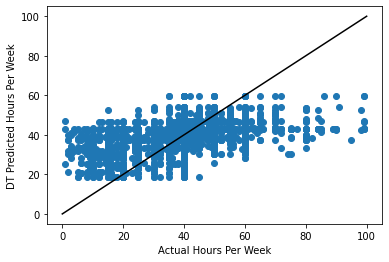

In [79]:
plt.scatter(y_test, tree_preds_new)
x = np.linspace(0,100,num=100)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('DT Predicted Hours Per Week')

Text(0, 0.5, 'RF Predicted Hours Per Week')

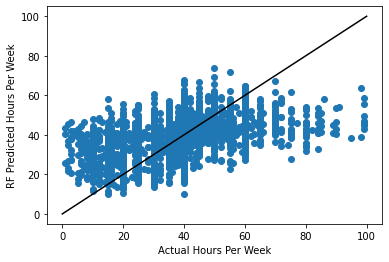

In [80]:
plt.scatter(y_test, rf_preds_new)
x = np.linspace(0,100,num=100)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('RF Predicted Hours Per Week')

Text(0, 0.5, 'GBDT Predicted Hours Per Week')

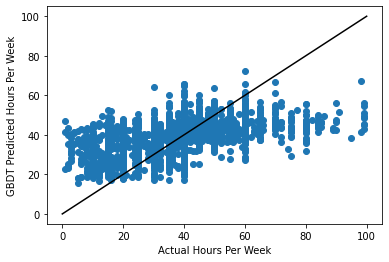

In [81]:
plt.scatter(y_test, gbdt_preds_new)
x = np.linspace(0,100,num=100)
plt.plot(x,x,color='black')
plt.xlabel('Actual Hours Per Week')
plt.ylabel('GBDT Predicted Hours Per Week')

The scatterplots comparing the predicted versus the actual values of hours per week from each model look relatively similar to the first round of scatterplots except for that of the single decision tree. The new version of the single decision tree model produced a set of predictions that looks very similar to those of the random forest and gradient-boosted decision tree's.

In [82]:
# look at regression coefficients
lin_coefs_new = pd.Series(lin_mod_new.coef_, index=X_new.columns)
lin_coefs_new.sort_values(ascending=False, inplace=True)
lin_coefs_new[:]

sex_selfID_Non-Female           9.085831e+13
sex_selfID_Female               9.085831e+13
workclass_Self-emp-inc          6.442103e+13
workclass_Self-emp-not-inc      6.442103e+13
workclass_Local-gov             6.442103e+13
workclass_Private               6.442103e+13
workclass_Federal-gov           6.442103e+13
workclass_State-gov             6.442103e+13
workclass_Without-pay           6.442103e+13
capital-gain_scaled             4.466001e-01
capital-loss_scaled             2.269482e-01
fnlwgt_scaled                  -1.314321e-01
age_scaled                     -9.034032e-01
education_Doctorate            -4.247275e+13
education_Prof-school          -4.247275e+13
education_Masters              -4.247275e+13
education_Bachelors            -4.247275e+13
education_Assoc-voc            -4.247275e+13
education_Assoc-acdm           -4.247275e+13
education_HS-grad              -4.247275e+13
education_Some-college         -4.247275e+13
education_7th-8th              -4.247275e+13
education_

Text(0.5, 1.0, 'Top 10 Most Important Features in DT')

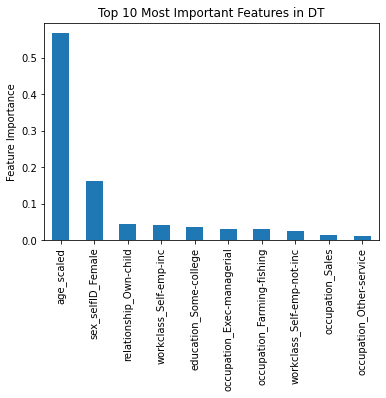

In [83]:
# make feature importance plots for each of the tree-based models
tree_imps_new = pd.Series(tree_mod_new.feature_importances_, index=X_new.columns)
tree_imps_new.sort_values(ascending=False, inplace=True)
tree_imps_new[:10].plot.bar()
plt.ylabel('Feature Importance')
plt.title('Top 10 Most Important Features in DT')

Text(0.5, 1.0, 'Top 10 Most Important Features in RF')

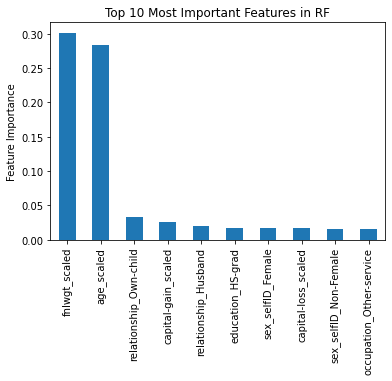

In [84]:
rf_imps_new = pd.Series(rf_mod_new.feature_importances_, index=X_new.columns)
rf_imps_new.sort_values(ascending=False, inplace=True)
rf_imps_new[:10].plot.bar()
plt.ylabel('Feature Importance')
plt.title('Top 10 Most Important Features in RF')

Text(0.5, 1.0, 'Top 10 Most Important Features in GBDT')

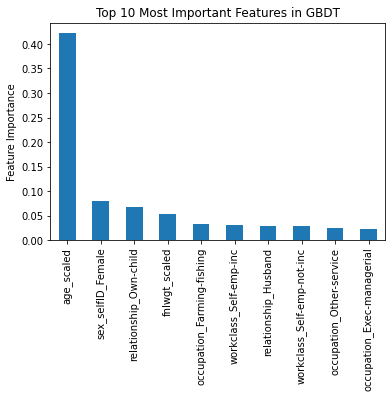

In [85]:
gbdt_imps_new = pd.Series(gbdt_mod_new.feature_importances_, index=X_new.columns)
gbdt_imps_new.sort_values(ascending=False, inplace=True)
gbdt_imps_new[:10].plot.bar()
plt.ylabel('Feature Importance')
plt.title('Top 10 Most Important Features in GBDT')

The new feature importance plots reflect similar changes in the single decision tree model. It closely resembles the importance plot of the gradient-boosted decision tree, with age as the easily most important feature of all, followed by a category of sex and relationship. The random forest's importance plot looks very similar to how it did the first time around, with age and fnlwgt marked as the two most important features.

### Concluding Remarks

The gradient-boosted decision tree proved to be the best-performing model when it came to predicting the number of hours per week that people work, using U.S. Census data from 1994. Of all the available information about the employees that the model was built on, it determined that a person's age is the factor which has the most impact on how much they work. Following age, though with significantly less impact on the final prediction, was the sex of the employee, which indicates that there are prominent differences in the number of hours per week that women were reported to work compared to those worked by men. Given the continually prevalent notion that women should stay home while men work to support their families, this discrepancy is not surprising. Though a gender imbalance was identified by the models in the amount of hours that people work, there was not a similar imbalance found in categories of race, country of origin, or marital status, which was somewhat surprising. The numeric features of age and fnlwgt in particular showed up frequently as some of the most important features, and this could be because they had much more controlled ranges than the other numeric features (capital gain and capital loss) did. Perhaps, with more numeric features with relevant data about each employee and less binary categorical features, the models could improve upon their predictions of hours per week. In general, though, for a label with a highly uneven distribution to begin with, the models performed adequately and picked up on some interesting trends in the working patterns of U.S. employees.  